In [32]:
import pandas as pd

In [33]:
import numpy as np

In [34]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [49]:
df = pd.read_csv("Assignment-3_1.csv")

In [50]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [51]:
y = df['Chance of Admit ']

In [52]:
x = df.drop('Chance of Admit ',axis=1)

In [62]:
from sklearn.preprocessing import Binarizer
bi = Binarizer(threshold=0.75)
y = bi.fit_transform(y)

In [63]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1,train_size=0.75)

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
dc = DecisionTreeClassifier()

In [66]:
dc.fit(x_train,y_train)

DecisionTreeClassifier()

In [67]:
y_pred = dc.predict(x_test)

In [68]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,classification_report

Accuracy score is  0.88 

              precision    recall  f1-score   support

         0.0       0.91      0.88      0.89        56
         1.0       0.85      0.89      0.87        44

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100



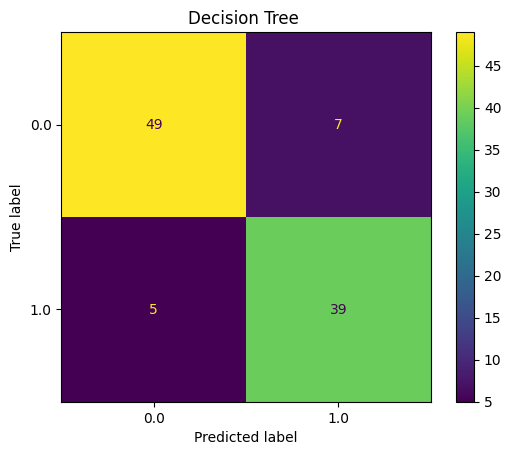

In [69]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.title("Decision Tree ")
plt.plot()
print("Accuracy score is ",accuracy_score(y_test,y_pred),"\n")
print(classification_report(y_test,y_pred))

In [70]:
from sklearn import tree

[Text(0.5848684210526316, 0.9545454545454546, 'CGPA <= 8.74\ngini = 0.489\nsamples = 300\nvalue = [172, 128]'),
 Text(0.32763157894736844, 0.8636363636363636, 'TOEFL Score <= 108.5\ngini = 0.193\nsamples = 176\nvalue = [157, 19]'),
 Text(0.45625000000000004, 0.9090909090909092, 'True  '),
 Text(0.19210526315789472, 0.7727272727272727, 'LOR  <= 4.25\ngini = 0.123\nsamples = 152\nvalue = [142, 10]'),
 Text(0.12105263157894737, 0.6818181818181818, 'CGPA <= 8.435\ngini = 0.08\nsamples = 144\nvalue = [138, 6]'),
 Text(0.042105263157894736, 0.5909090909090909, 'TOEFL Score <= 105.5\ngini = 0.018\nsamples = 108\nvalue = [107, 1]'),
 Text(0.021052631578947368, 0.5, 'gini = 0.0\nsamples = 87\nvalue = [87, 0]'),
 Text(0.06315789473684211, 0.5, 'Research <= 0.5\ngini = 0.091\nsamples = 21\nvalue = [20, 1]'),
 Text(0.042105263157894736, 0.4090909090909091, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.08421052631578947, 0.4090909090909091, 'University Rating <= 2.5\ngini = 0.245\nsamples =

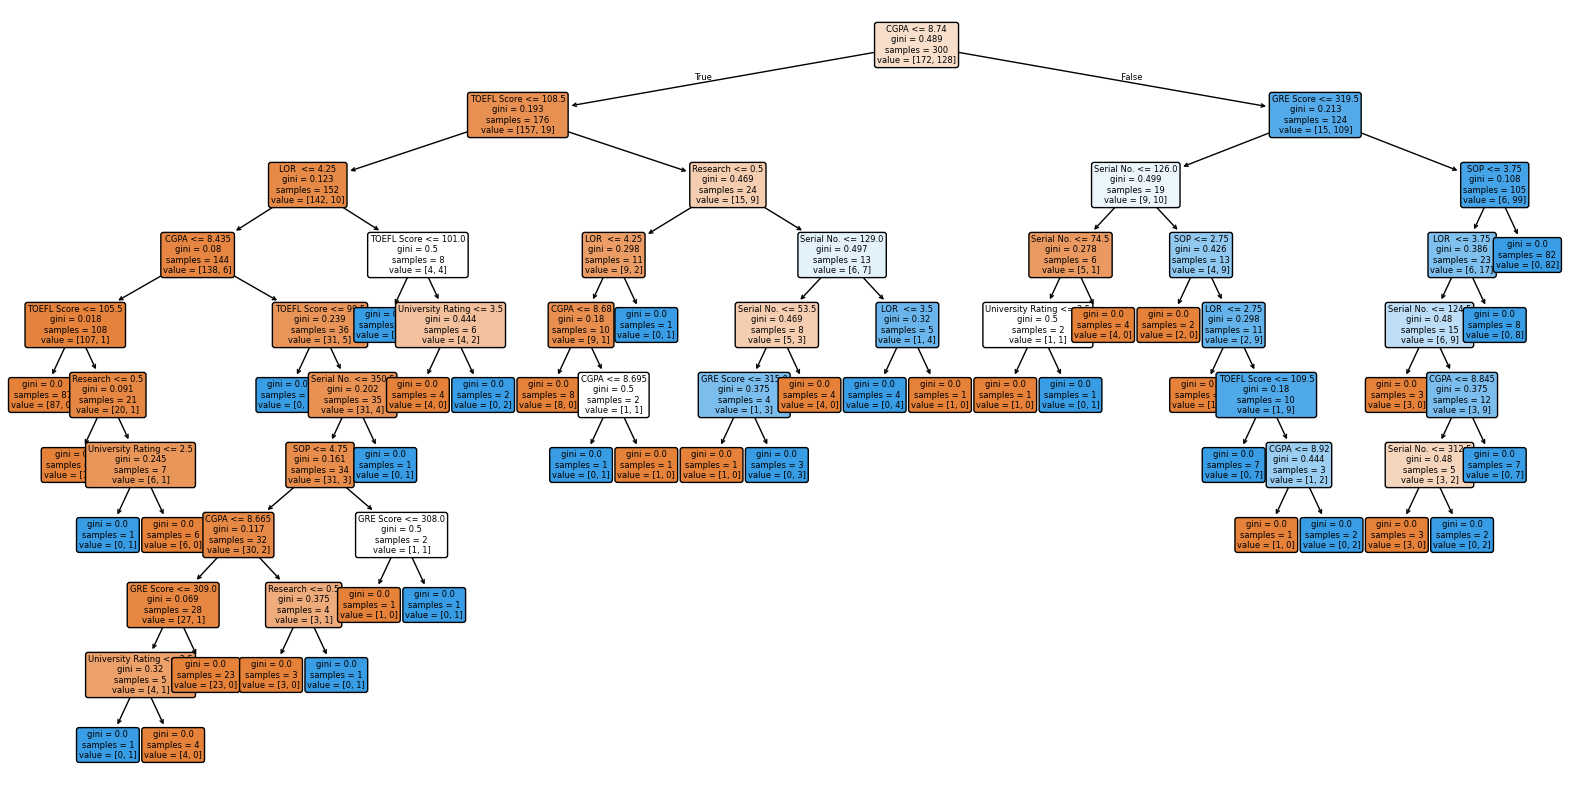

In [75]:
plt.figure(figsize=(20,10))
tree.plot_tree(dc,rounded=True,fontsize=6,filled=True,feature_names=x.columns)